In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import sklearn

import math

Text(0.5, 1.0, 'Sobel Horizontal Image')

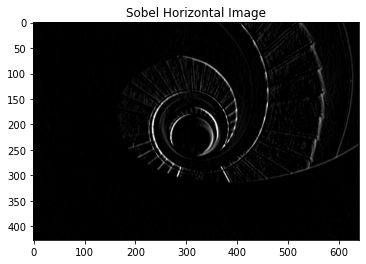

In [2]:
spiral = cv2.imread("spiral.jpg")

x_kernel_mask = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # the soble mask is made out of nested array
y_kernel_mask = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) 

img_blurred = cv2.GaussianBlur(spiral, (3,3), cv2.BORDER_DEFAULT) # border_type is set to deafault borders of image
img_gray = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2GRAY)

Sobel_Horizontal_Image = cv2.filter2D(img_gray, -1, x_kernel_mask) # using filter2d to apply kernels to original image
Sobel_Vertical_Image = cv2.filter2D(img_gray, -1, y_kernel_mask)

plt.imshow(Sobel_Horizontal_Image, cmap='gray')
plt.title("Sobel Horizontal Image")

Text(0.5, 1.0, 'Sobel Vertical Image')

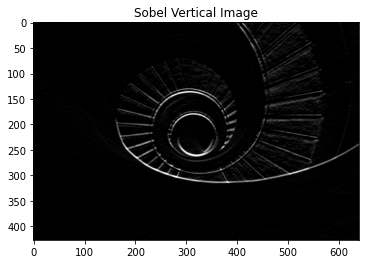

In [3]:
plt.imshow(Sobel_Vertical_Image, cmap='gray')
plt.title("Sobel Vertical Image")

Text(0.5, 1.0, 'Gradient Image')

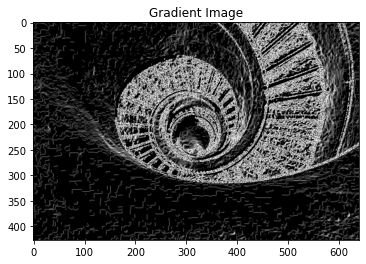

In [4]:
gradient_magnitude = np.sqrt(np.square(Sobel_Horizontal_Image) + np.square(Sobel_Vertical_Image)) # equation follows that of gradient = sqrt(x**2+y**2)
gradient_magnitude = gradient_magnitude.astype('uint8') # converting to appropriate type

plt.imshow(gradient_magnitude, cmap="gray")
plt.title("Gradient Image")

In [5]:
# STAIRS SOBEL EDGE DETECTION THRESHOLD 0-14
def gradient_threshold(x):
    pass

def getTrackBarPosition():
    return int(cv2.getTrackbarPos('𝜏', "Sobel Edge Detection"))

def check_grad(img):
    x = getTrackBarPosition()
    for i in range(len(gradient_magnitude)):
        for j in range(len(gradient_magnitude[i])):
            if gradient_magnitude[i][j] > x: # looping through all pixels of magnitude image and checking if they greater than threshold --> if yes turn white, if not blackout
                img[i][j] = 255
            else:
                img[i][j] = 0

cv2.namedWindow("Sobel Edge Detection", cv2.WINDOW_NORMAL)
cv2.createTrackbar('𝜏', "Sobel Edge Detection",0, 25, gradient_threshold)

temp = 0
cpy = img_gray.copy()

global cpy, gradient_magnitude
while True:
    cv2.imshow("Sobel Edge Detection", cpy)
    k = getTrackBarPosition()
    if temp != k:
        temp = k
        check_grad(cpy)
    
    if cv2.waitKey(1) == 27:
        break 
cv2.destroyAllWindows()

In [ ]:
def upper_threshold(x):
    pass

def lower_threshold(x):
    pass

def getUpperThreshold():
    return int(cv2.getTrackbarPos('𝜏1', "Canny Edge Detection"))

def getLowerThreshold():
    return int(cv2.getTrackbarPos('𝜏2', "Canny Edge Detection"))

cv2.namedWindow("Canny Edge Detection", cv2.WINDOW_NORMAL)
cv2.createTrackbar('𝜏1', "Canny Edge Detection",0, 25, upper_threshold)
cv2.createTrackbar('𝜏2', "Canny Edge Detection",0, 25, lower_threshold)

temp_low = 0
temp_high = 0
cpy2 = img_gray.copy()
while True:
    cv2.imshow("Canny Edge Detection", cpy2)
    low_thresh = getLowerThreshold()
    high_thresh = getUpperThreshold()
    if temp_low != low_thresh or temp_high != high_thresh: # checking if either high or low threshold have changed
        temp_low = low_thresh
        temp_high = high_thresh
        cpy2 = cv2.Canny(img_gray, low_thresh, high_thresh, (3,3)) # applying .Canny() edge detection to image with a 3x3 kernel
        
    if cv2.waitKey(1) == 27:
        break 
cv2.destroyAllWindows()

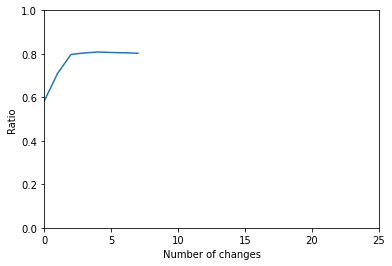

In [7]:
img_gray = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2GRAY)
temp_2 = 0
cpy2 = img_gray.copy()
cpy = img_gray.copy()
ratio = []

def edge_ratio(img1, img2):
    img_width, img_height = img1.shape
    total_pixels = img_height*img_width
    count = 0
    for i in range(img_height-1):
        for j in range(img_width-1):
            if img1[j][i] == img2[j][i]: # if the pixels are identical from the sobel general and canny images
                count += 1 
    ratio.append(count/total_pixels) # whatever pixels are identical are summed and divided by total pixel amount to return a ratio --> form of list to be printed later

cv2.namedWindow("Canny Edge Detection", cv2.WINDOW_NORMAL)
cv2.createTrackbar('𝜏1', "Canny Edge Detection",0, 25, upper_threshold)
cv2.createTrackbar('𝜏2', "Canny Edge Detection",0, 25, lower_threshold)
cv2.namedWindow("Sobel Edge Detection", cv2.WINDOW_NORMAL)
cv2.createTrackbar('𝜏', "Sobel Edge Detection",0, 25, gradient_threshold)

while True:
    cv2.imshow("Sobel Edge Detection", cpy)
    𝜏 = getTrackBarPosition()
    cv2.imshow("Canny Edge Detection", cpy2)
    low_thresh = getLowerThreshold()
    high_thresh = getUpperThreshold()
    if temp_low != low_thresh or temp_high != high_thresh or 𝜏 != temp_2:
        temp_low = low_thresh
        temp_high = high_thresh
        temp_2 = 𝜏
        cpy2 = cv2.Canny(img_gray, low_thresh, high_thresh, (3,3))
        check_grad(cpy)
        edge_ratio(cpy, cpy2)
        
    
    if cv2.waitKey(1) == 27:
        plt.plot(ratio)
        plt.axis([0, 25, 0, 1])
        plt.xlabel("Number of changes")
        plt.ylabel("Ratio")
        plt.show
        break 
cv2.destroyAllWindows()


In [8]:
# SOBEL EDGE DETECTION ON LINES.PNG -- THRESHOLD 0-14
import cv2
from matplotlib import pyplot as plt
import numpy as np
import sklearn
import math

lines = cv2.imread("lines.jpg")

lines_blurred = cv2.GaussianBlur(lines, (3,3), cv2.BORDER_DEFAULT) # border_type is set to deafault borders of image
gray_lines = cv2.cvtColor(lines_blurred, cv2.COLOR_BGR2GRAY)
x_kernel_mask = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # the soble mask is made out of nested array
y_kernel_mask = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) 

def gradient_threshold(x):
    pass

def getTrackBarPosition():
    return int(cv2.getTrackbarPos('𝜏', "Sobel Edge Detection"))

Sobel_Horizontal_Image_line = cv2.filter2D(gray_lines, -1, x_kernel_mask) # using filter2d to apply kernels to original image
Sobel_Vertical_Image_line = cv2.filter2D(gray_lines, -1, y_kernel_mask)
gradient_magnitude_line = np.sqrt(np.square(Sobel_Horizontal_Image_line) + np.square(Sobel_Vertical_Image_line)) # equation follows that of gradient = sqrt(x**2+y**2)
gradient_magnitude_line = gradient_magnitude_line.astype('uint8') # converting to appropriate type


cv2.namedWindow("Sobel Edge Detection", cv2.WINDOW_NORMAL)
cv2.createTrackbar('𝜏', "Sobel Edge Detection",0, 25, gradient_threshold)
temp = 0
line = gray_lines.copy()

def check_grad_2():
    x = getTrackBarPosition()
    for i in range(len(gradient_magnitude_line)-1):
        for j in range(len(gradient_magnitude_line[i])-1):
            if gradient_magnitude_line[i][j] > x: # looping through all pixels of magnitude image and checking if they greater than threshold --> if yes turn white, if not blackout
                    line[i][j] = 255
            else:
                line[i][j] = 0

global cpy, gradient_magnitude
while True:
    cv2.imshow("Sobel Edge Detection", line)
    k = getTrackBarPosition()
    if temp != k:
        temp = k
        check_grad_2()
    
    if cv2.waitKey(1) == 27:
        break 
cv2.destroyAllWindows()

In [9]:
# SOBEL EDGE DETECTION ON LINES.PNG --> THRESHOLD 0-15
import cv2
from matplotlib import pyplot as plt
import numpy as np
import sklearn
import math

lena = cv2.imread("lena.png")

lena_blurred = cv2.GaussianBlur(lena, (3,3), cv2.BORDER_DEFAULT) # border_type is set to deafault borders of image
gray_lena = cv2.cvtColor(lena_blurred, cv2.COLOR_BGR2GRAY)
x_kernel_mask = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # the soble mask is made out of nested array
y_kernel_mask = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) 

def gradient_threshold(x):
    pass

def getTrackBarPosition():
    return int(cv2.getTrackbarPos('𝜏', "Sobel Edge Detection"))

Sobel_Horizontal_Image_lena = cv2.filter2D(gray_lena, -1, x_kernel_mask) # using filter2d to apply kernels to original image
Sobel_Vertical_Image_lena = cv2.filter2D(gray_lena, -1, y_kernel_mask)
gradient_magnitude_lena = np.sqrt(np.square(Sobel_Horizontal_Image_lena) + np.square(Sobel_Vertical_Image_lena)) # equation follows that of gradient = sqrt(x**2+y**2)
gradient_magnitude_lena = gradient_magnitude_lena.astype('uint8') # converting to appropriate type


cv2.namedWindow("Sobel Edge Detection", cv2.WINDOW_NORMAL)
cv2.createTrackbar('𝜏', "Sobel Edge Detection",0, 25, gradient_threshold)
temp = 0
line = gray_lines.copy()

def check_grad_3():
    x = getTrackBarPosition()
    for i in range(len(gradient_magnitude_lena)-1):
        for j in range(len(gradient_magnitude_lena[i])-1):
            if gradient_magnitude_lena[i][j] > x: # looping through all pixels of magnitude image and checking if they greater than threshold --> if yes turn white, if not blackout
                    lena[i][j] = 255
            else:
                lena[i][j] = 0

while True:
    cv2.imshow("Sobel Edge Detection", lena)
    k = getTrackBarPosition()
    if temp != k:
        temp = k
        check_grad_3()
    
    if cv2.waitKey(1) == 27:
        break 
cv2.destroyAllWindows()